In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
decisions = ['P','S','R']

#probability of starting decision
p_start = [0.1,0.2,0.7]

t1 = ['P','S','R']
p_t1 = np.array([[1,1,1],[1,1,1],[1,1,1]])




initial = np.random.choice(decisions,replace=True, p=p_start)


In [3]:
def make_choice(opponent_prediction):
    if opponent_prediction == 'P':
        return 'S'
    if opponent_prediction == 'S':
        return 'R'
    if opponent_prediction == 'R':
        return 'P'
    
def check_outcome(opt_choice,my_choice):
    if my_choice == 'P' and opt_choice == 'P':
        return 0
    if my_choice == 'P' and opt_choice == 'S':
        return -1
    if my_choice == 'P' and opt_choice == 'R':
        return 1
    if my_choice == 'S' and opt_choice == 'P':
        return 1
    if my_choice == 'S' and opt_choice == 'S':
        return 0
    if my_choice == 'S' and opt_choice == 'R':
        return -1
    if my_choice == 'R' and opt_choice == 'P':
        return -1
    if my_choice == 'R' and opt_choice == 'S':
        return 1
    if my_choice == 'R' and opt_choice == 'R':
        return 0
    

Compuer scores
 Win:93
Loss:61
Ties:46
Transitional matrix:
 [[ 2  6 14]
 [ 7 11 34]
 [13 35 87]]
Opponent probability [0.1, 0.2, 0.7]


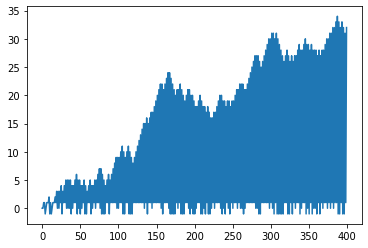

In [4]:
n = 200

wins = 0
loss = 0
ties = 0
history = []
opponent_choice = initial
state = initial
wallet = 0
for i in range(n):
    
    
    if state == 'P':
        rowP_prob = p_t1[0,:]/sum(p_t1[0,:])
        if opponent_choice == 'P':
            p_t1[0,0] += 1
        elif opponent_choice == 'S':
            p_t1[0,1] += 1
        elif opponent_choice == 'R':
            p_t1[0,2] += 1
        state = np.random.choice(t1,p=rowP_prob)
    elif state == 'S':
        rowS_prob = p_t1[1,:]/sum(p_t1[1,:]) 
        if opponent_choice == 'P':
            p_t1[1,0] += 1
        elif opponent_choice == 'S':
            p_t1[1,1] += 1
        elif opponent_choice == 'R':
            p_t1[1,2] += 1
        state = np.random.choice(t1,p=rowS_prob)
    elif state == 'R':
        rowR_prob = p_t1[2,:]/sum(p_t1[2,:])
        if opponent_choice == 'P':
            p_t1[2,0] += 1
        elif opponent_choice == 'S':
            p_t1[2,1] += 1
        elif opponent_choice == 'R':
            p_t1[2,2] += 1
        state = np.random.choice(t1,p=rowR_prob)
    
    pc_choice = make_choice(state)
    state = opponent_choice
    outcome = check_outcome(opponent_choice,pc_choice)
    history.append(outcome)
    if outcome == 1:
        wins+=1
    elif outcome == -1:
        loss+=1
    elif outcome == 0:
        ties+=1
    wallet += outcome
    history.append(wallet)
#     print(f'Compuer choice: {pc_choice}, Opponent choice: {opponent_choice}')
#     print("\n")
    opponent_choice = np.random.choice(decisions,replace=True, p=p_start)
    
print(f'Compuer scores\n Win:{wins}\nLoss:{loss}\nTies:{ties}')
print(f'Transitional matrix:\n {p_t1}')
print(f'Opponent probability {p_start}')



plt.plot(history)
